In [1]:
import numpy as np
import jax
import matplotlib.pyplot as plt
import jax.numpy as jnp
import os

## Newton Raphson Method for simple Truss problem

In [22]:
def OneDTruss(d=2500.0, x=2500.0, area=100.0, e=5E5, nincr=1, fincr=1.5e7, cnorm=1e-20, miter=20):
    """
    Inputs:
        d: horizontal span
        x: initial height
        area: initial area
        e: Young's Modulus
        nincr: number of load increments
        fincr: force increment
        cnorm: residual force convergence norm
        miter: maximum number of iterations for Newton-Raphson
    """
    residuals = []
    f = 0.0
    l0 = jnp.sqrt(x**2 + d**2)
    vol = area * l0
    stiff = (area / l0) * e * (x / l0)**2

    for i in range(nincr):
        print(f"Increment {i}")
        f += fincr
        resid = f

        rnorm = cnorm * 2
        niter = 0

        while (rnorm > cnorm) and (niter < miter):
            niter += 1

            # Update geometry
            if jnp.abs(stiff) <= 1e-20:
                print("Stiffness near zero, stopping iteration")
                break

            u = -resid / stiff
            x += u
            l = jnp.sqrt(x**2 + d**2)
            area = vol / l

            # Calculate stresses and residual forces
            stress = e * jnp.log(l / l0)
            t = stress * area * x / l
            resid = t - f
            rnorm = abs(resid) / max(abs(f), 1e-20)

            print(f"Increment: {i}, Iteration: {niter}, rnorm: {rnorm}, x: {x}, f: {f}")

            # Update stiffness
            stiff = (area / l) * (e - 2 * stress) * (x / l)**2 + (stress * area / l)
            residuals.append(rnorm)

    return residuals


In [23]:
residuals = OneDTruss()

Increment 0
Increment: 0, Iteration: 1, rnorm: 1.2340015172958374, x: 378.679443359375, f: 15000000.0
Increment: 0, Iteration: 2, rnorm: 0.7185735702514648, x: -1869.55029296875, f: 15000000.0
Increment: 0, Iteration: 3, rnorm: 0.9786874055862427, x: -32.6263427734375, f: 15000000.0
Increment: 0, Iteration: 4, rnorm: 0.6069730520248413, x: -1532.0933837890625, f: 15000000.0
Increment: 0, Iteration: 5, rnorm: 1.413025975227356, x: 822.2017822265625, f: 15000000.0
Increment: 0, Iteration: 6, rnorm: 1.8850854635238647, x: -5109.98193359375, f: 15000000.0
Increment: 0, Iteration: 7, rnorm: 0.14772993326187134, x: 4942.16748046875, f: 15000000.0
Increment: 0, Iteration: 8, rnorm: 0.02387426607310772, x: 5667.2666015625, f: 15000000.0
Increment: 0, Iteration: 9, rnorm: 0.0010357333812862635, x: 5836.58740234375, f: 15000000.0
Increment: 0, Iteration: 10, rnorm: 2.3333334411290707e-06, x: 5844.62158203125, f: 15000000.0
Increment: 0, Iteration: 11, rnorm: 0.0, x: 5844.6396484375, f: 15000000.

In [24]:
n_iter = np.linspace(1, len(residuals), len(residuals))
residuals = np.array(residuals)

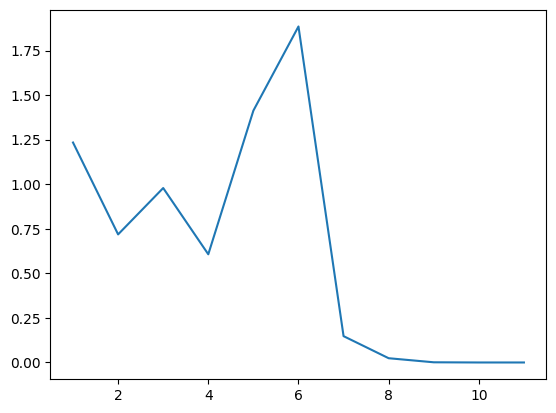

In [25]:
plt.plot(n_iter, residuals)